In [143]:
# packages
import os
import numpy as np 
import pandas as pd
from datetime import datetime
import time

# plots
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [144]:
# read scores.csv file
scores = pd.read_csv('scores.csv')
# madrs1 = MADRS score when measurement started
# madrs2 = MADRS when measurement stopped
# difference of madrs1 and madrs2
scores['DeltaMADRS'] = scores.madrs2 - scores.madrs1

In [145]:
#scores

In [146]:
# conditions data in scores file
df_condition = scores[scores.number.str.contains('condition')].copy()

In [147]:
df_condition.isnull().any()

number        False
days          False
gender        False
age           False
afftype       False
melanch        True
inpatient     False
edu           False
marriage      False
work          False
madrs1        False
madrs2        False
DeltaMADRS    False
dtype: bool

In [148]:
#drop na values in melanch
condition_scores_dropped = df_condition.dropna()
#condition_scores_dropped

In [149]:
# different features divided by numerical and categorical features
numerical_features = ['days','madrs1','madrs2','DeltaMADRS']
categorical_features = ['age', 'gender', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work']

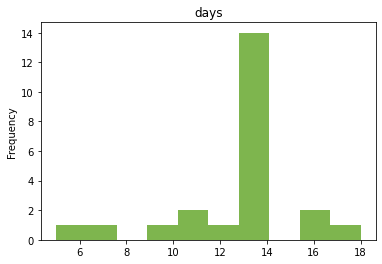

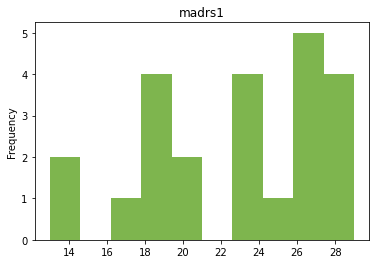

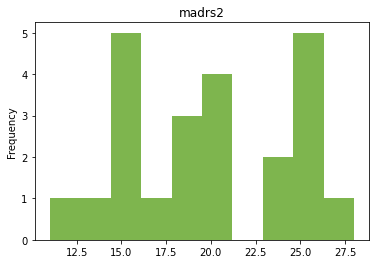

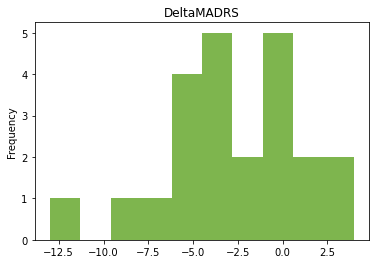

In [150]:
# numerical features plot frequncy
for i in numerical_features:
    df_condition[i].plot(kind='hist', color = '#7eb54e')
    plt.title(i)
    plt.ylabel("Frequency")
    plt.show()

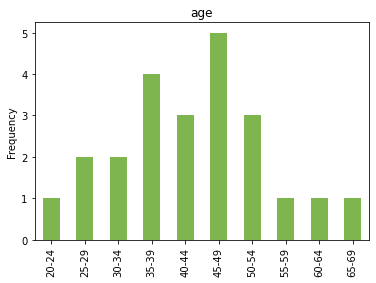

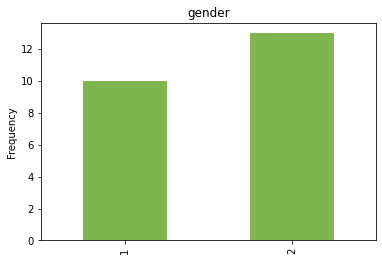

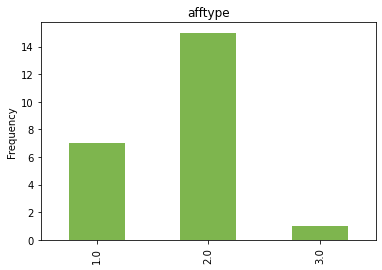

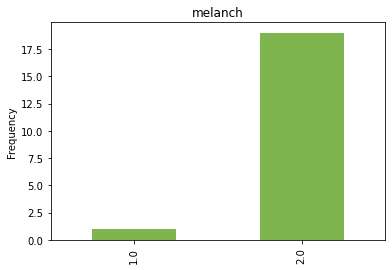

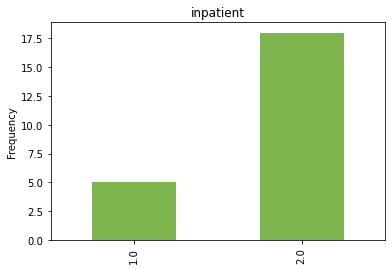

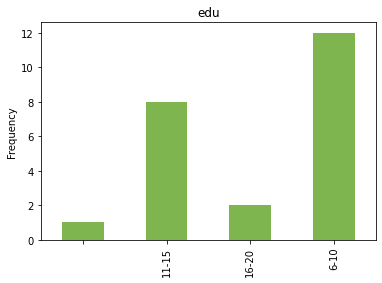

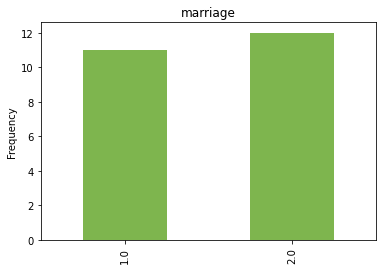

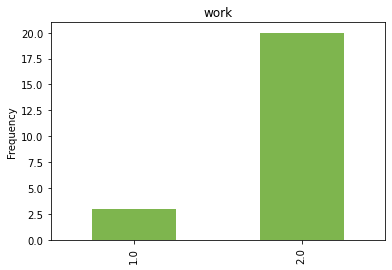

In [151]:
# the rest categorical features plot frequncy
for i in categorical_features:
    df_condition[i].value_counts().sort_index().plot(kind='bar', color = '#7eb54e')
    plt.title(i)
    plt.ylabel("Frequency")
    #plt.grid()
    plt.show()

In [152]:
# numerical features data descriptions
df_condition[numerical_features].describe()

,days,madrs1,madrs2,DeltaMADRS
count,23.000000,23.000000,23.000000,23.000000
mean,12.652174,22.739130,20.000000,-2.739130
std,2.773391,4.797892,4.729021,3.968253
min,5.000000,13.000000,11.000000,-13.000000
25%,12.500000,18.500000,16.000000,-5.000000
50%,13.000000,24.000000,21.000000,-3.000000
75%,14.000000,26.000000,24.500000,0.000000
max,18.000000,29.000000,28.000000,4.000000


In [153]:
# correlation matrix of the numerical features
df_condition[numerical_features].corr(method='pearson')

,days,madrs1,madrs2,DeltaMADRS
days,1.000000,0.122678,0.027726,-0.115285
madrs1,0.122678,1.000000,0.653090,-0.430772
madrs2,0.027726,0.653090,1.000000,0.402082
DeltaMADRS,-0.115285,-0.430772,0.402082,1.000000


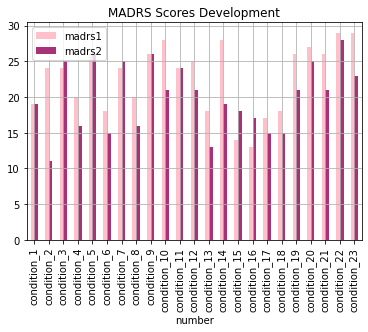

In [154]:
# MADRS scores (madrs1 (MADRS score when measurement started), madrs2 (MADRS when measurement stopped).)
df_condition.plot(x='number', y=['madrs1','madrs2'], kind='bar', color=('pink','#a83277'))
plt.title('MADRS Scores Development')
plt.grid()
plt.show()


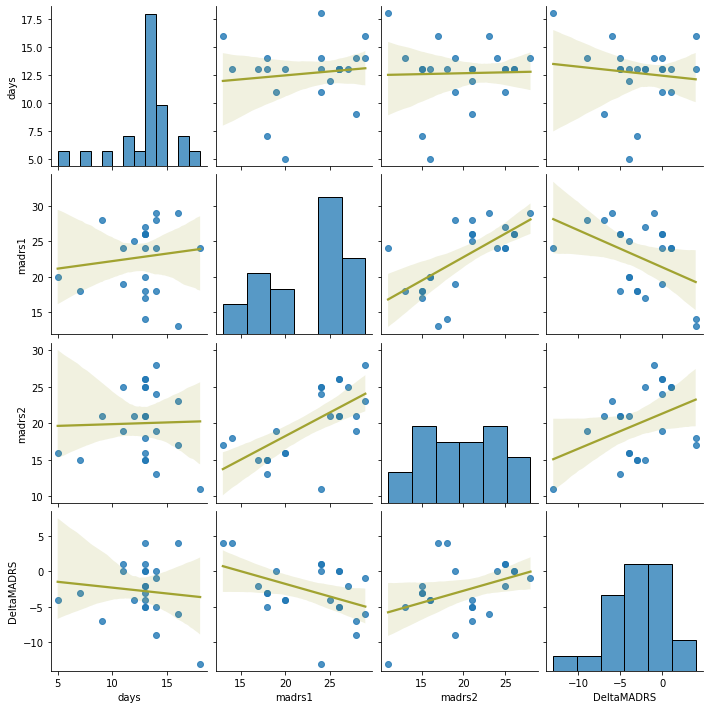

In [155]:
# scatter plot for each pair of numerical features in conditions data, incl. regression line
sns.pairplot(df_condition[numerical_features], kind='reg', plot_kws={'line_kws':{'color':'#a1a331'}})
plt.show()

In [156]:
df_control = scores[scores.number.str.contains('control')].copy()
df_control_dropped = df_control.dropna(axis=1, how='any')
df_control_dropped

,number,days,gender,age
23,control_1,8,2,25-29
24,control_2,20,1,30-34
25,control_3,12,2,30-34
26,control_4,13,1,25-29
27,control_5,13,1,30-34
28,control_6,13,1,25-29
29,control_7,13,1,20-24
30,control_8,13,2,40-44
31,control_9,13,2,30-34
32,control_10,8,1,30-34


In [157]:
control_features = ['days','gender','age']

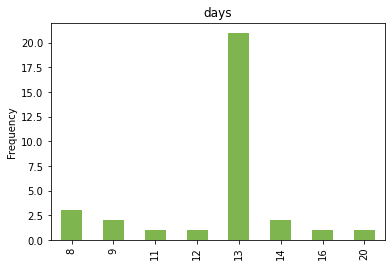

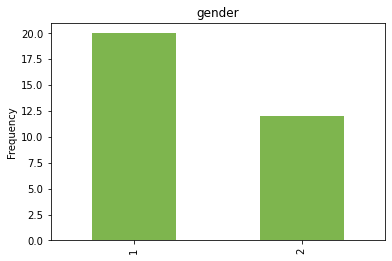

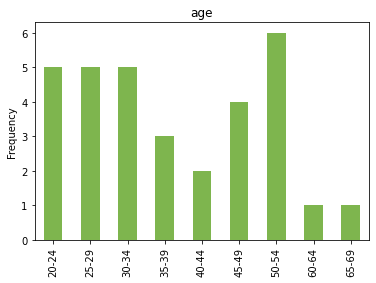

In [158]:
for i in control_features:
    df_control_dropped[i].value_counts().sort_index().plot(kind='bar', color = '#7eb54e')
    plt.title(i)
    plt.ylabel("Frequency")
    plt.show()

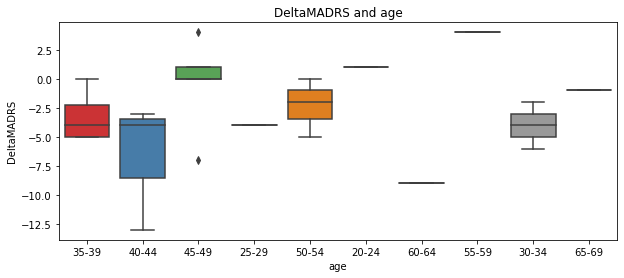

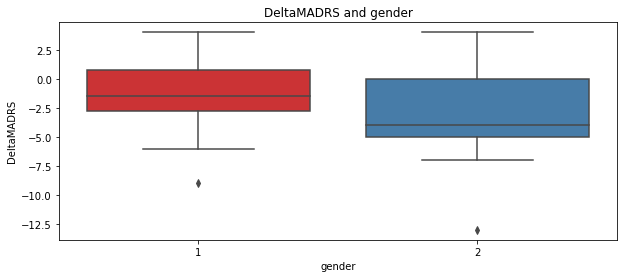

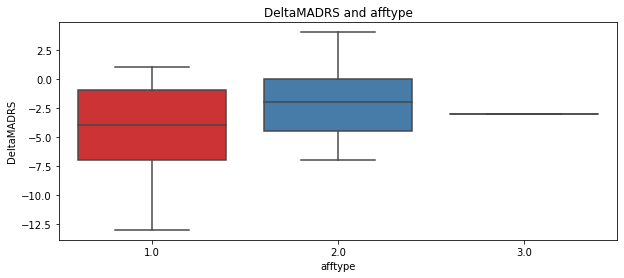

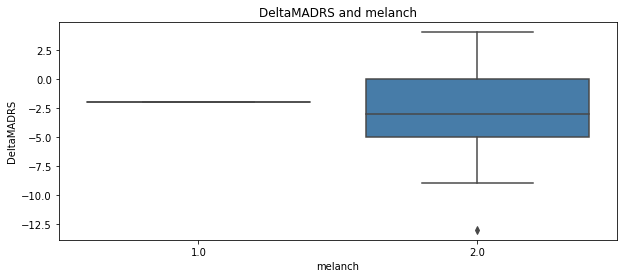

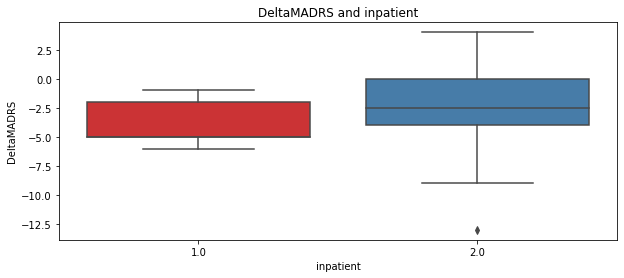

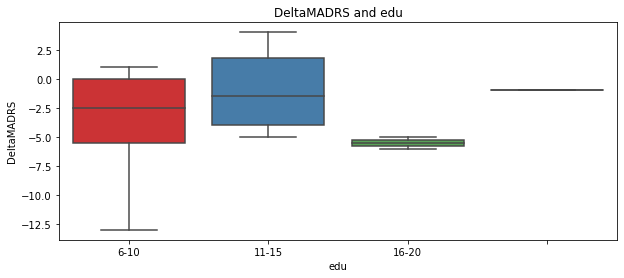

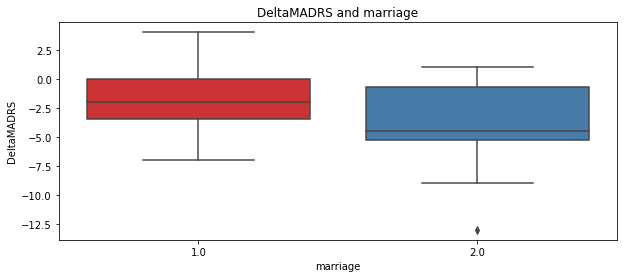

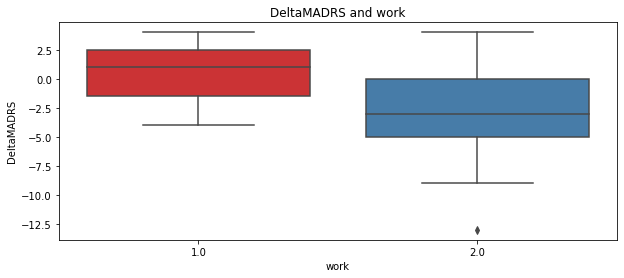

In [180]:
# comparison of MDRS scores difference DeltaMADRS and categorical features
for feature in categorical_features:
    plt.figure(figsize = (10,4))
    sns.boxplot(data = df_condition, x = feature, y = 'DeltaMADRS', palette='Set1')
    plt.title('DeltaMADRS and ' + feature)
    plt.show()

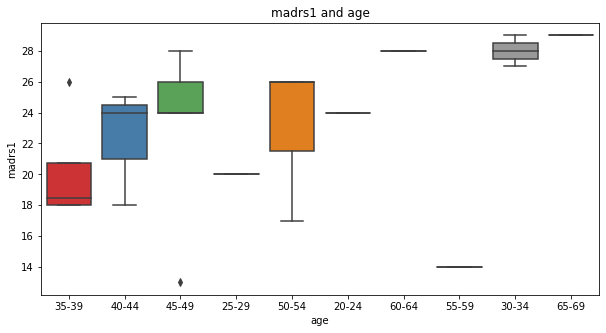

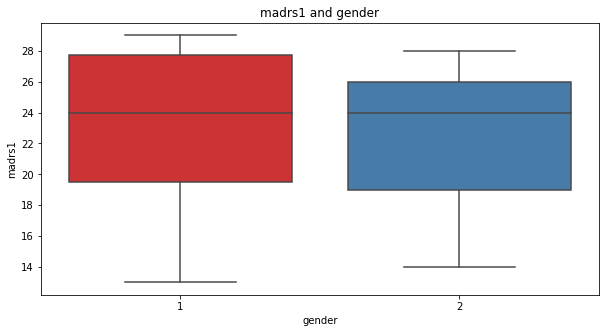

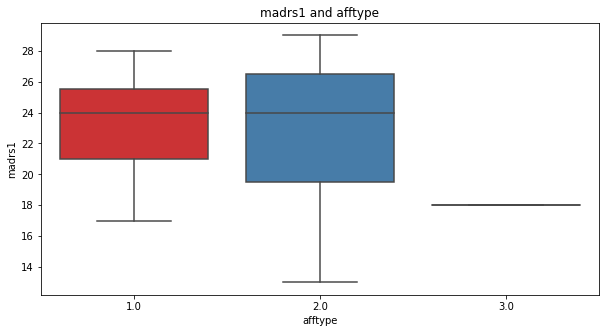

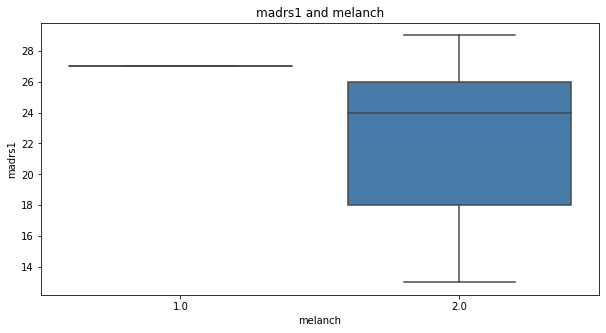

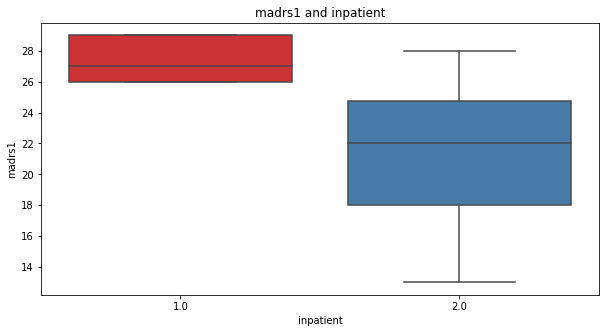

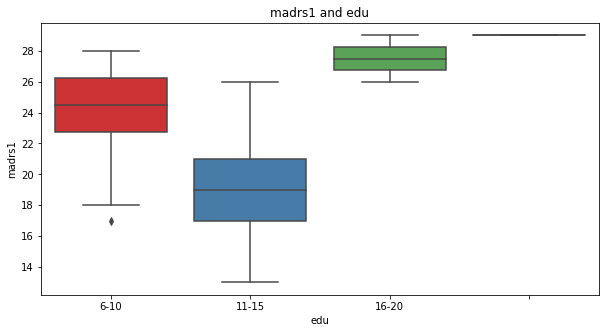

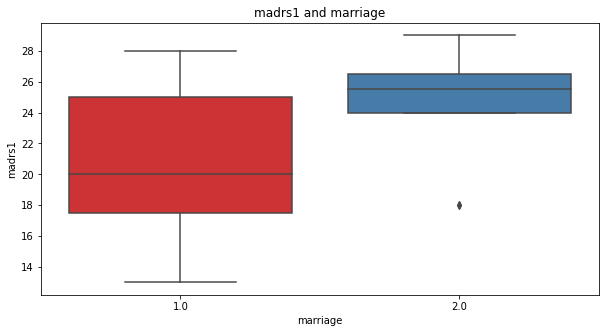

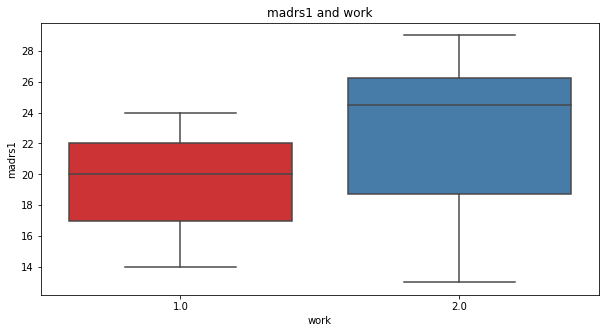

In [181]:
# comparison of Madrs1 scores difference madrs1 and categorical features
for feature in categorical_features:
    plt.figure(figsize = (10,5))
    sns.boxplot(data = df_condition, x = feature, y='madrs1', palette='Set1')
    plt.title('madrs1 and ' + feature)
    plt.show()

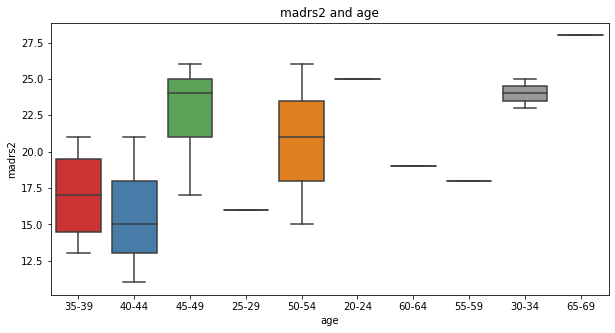

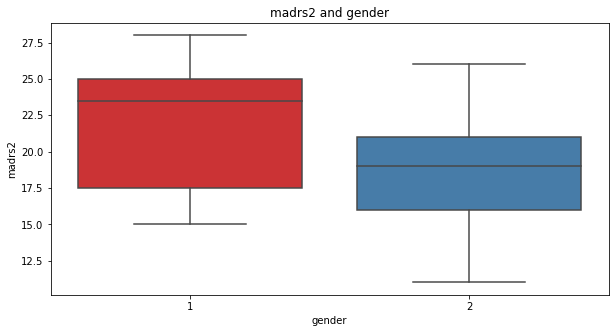

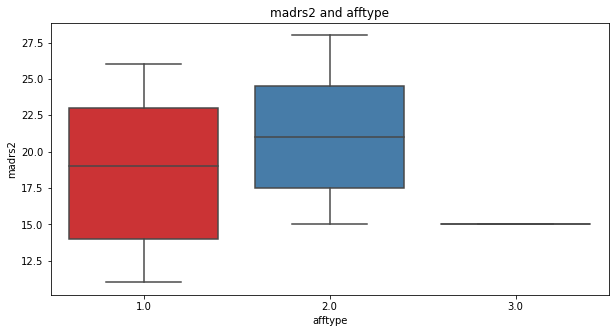

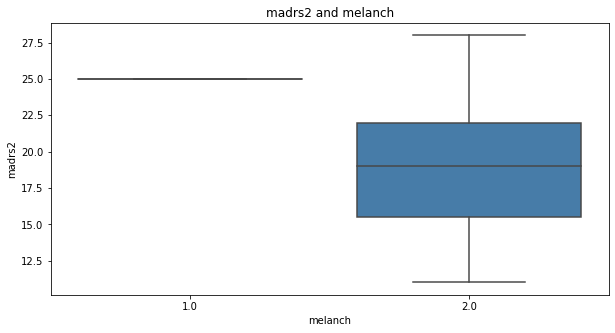

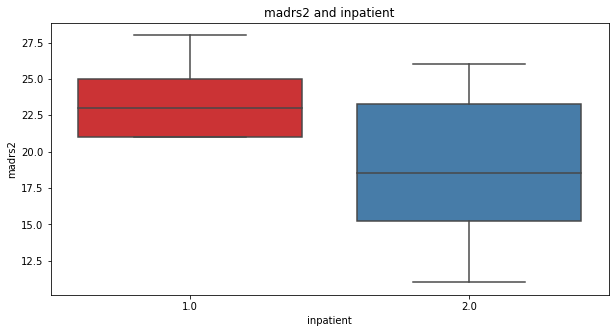

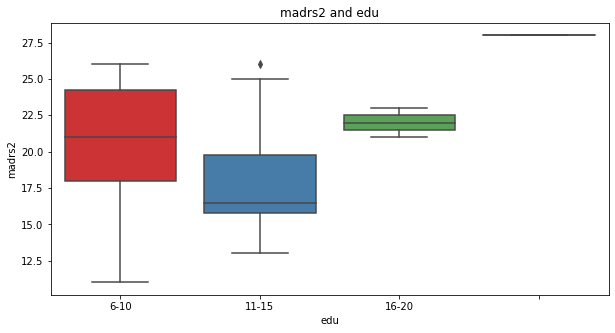

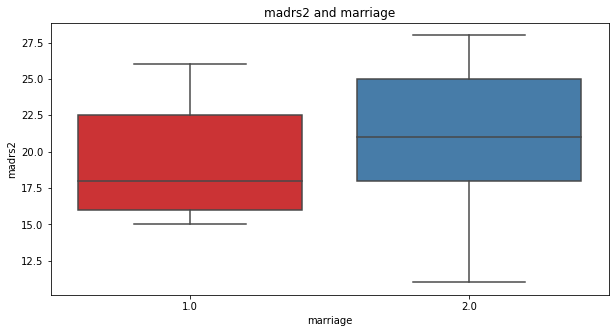

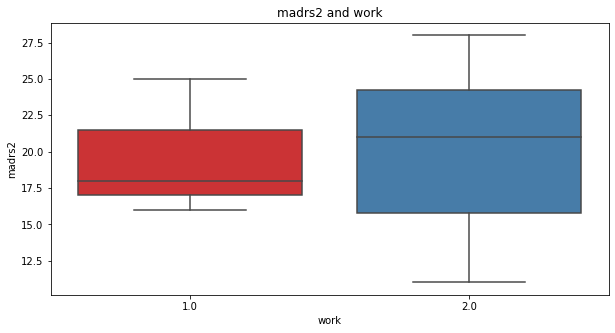

In [179]:
# comparison of Madrs2 scores difference madrs2 and categorical features
for feature in categorical_features:
    plt.figure(figsize = (10,5))
    sns.boxplot(data = df_condition, x = feature, y='madrs2', palette='Set1')
    plt.title('madrs2 and ' + feature)
    plt.show()

In [165]:
# Combining data function
def combined_data(name, number):
    combined_df = []
    
    for i in range(1, number):
        x = pd.read_csv(name +'_'+ str(i)+'.csv', parse_dates=['timestamp'], index_col='timestamp')
        combined_df.append(x)
        
    return combined_df

In [166]:
# Combined data of all conditions 23 csv files
combined_df_conditions = combined_data('condition', 23)
# Combined data of all controls 32 csv files
combined_df_controls = combined_data('control', 32)

In [194]:
#combined_df_conditions

In [199]:
# Conditions data with mean of activity, std deviation of activity and counting zeroes in activity
conditions = []
for condition in combined_df_conditions:
    condition_df = pd.DataFrame(columns=['mean_activity', 'std_dev_activity', 'zero_activity_count'])
    condition_df['mean_activity'] = condition.activity.resample('H').mean()
    condition_df['std_dev_activity'] = condition.activity.resample('H').std()
    condition_df['zero_activity_count'] = [data[1].tolist().count(0) for data in condition.activity.resample('H')]
    conditions.append(condition_df)

In [200]:
#conditions

In [201]:
# Controls data with mean of activity, std deviation of activity and counting zeroes in activity
controls = []
for control in combined_df_controls:
    control_df = pd.DataFrame(columns=['mean_activity', 'std_dev_activity', 'zero_activity_count'])
    control_df['mean_activity'] = control.activity.resample('H').mean()
    control_df['std_dev_activity'] = control.activity.resample('H').std()
    control_df['zero_activity_count'] = [data[1].tolist().count(0) for data in control.activity.resample('H')]
    controls.append(control_df)

In [202]:
#controls

In [204]:
# clock converter function
def clock_converter(time):
    dt = datetime.strptime(f'{time}:00', '%H:%M')
    return dt.strftime('%I:%M %p')

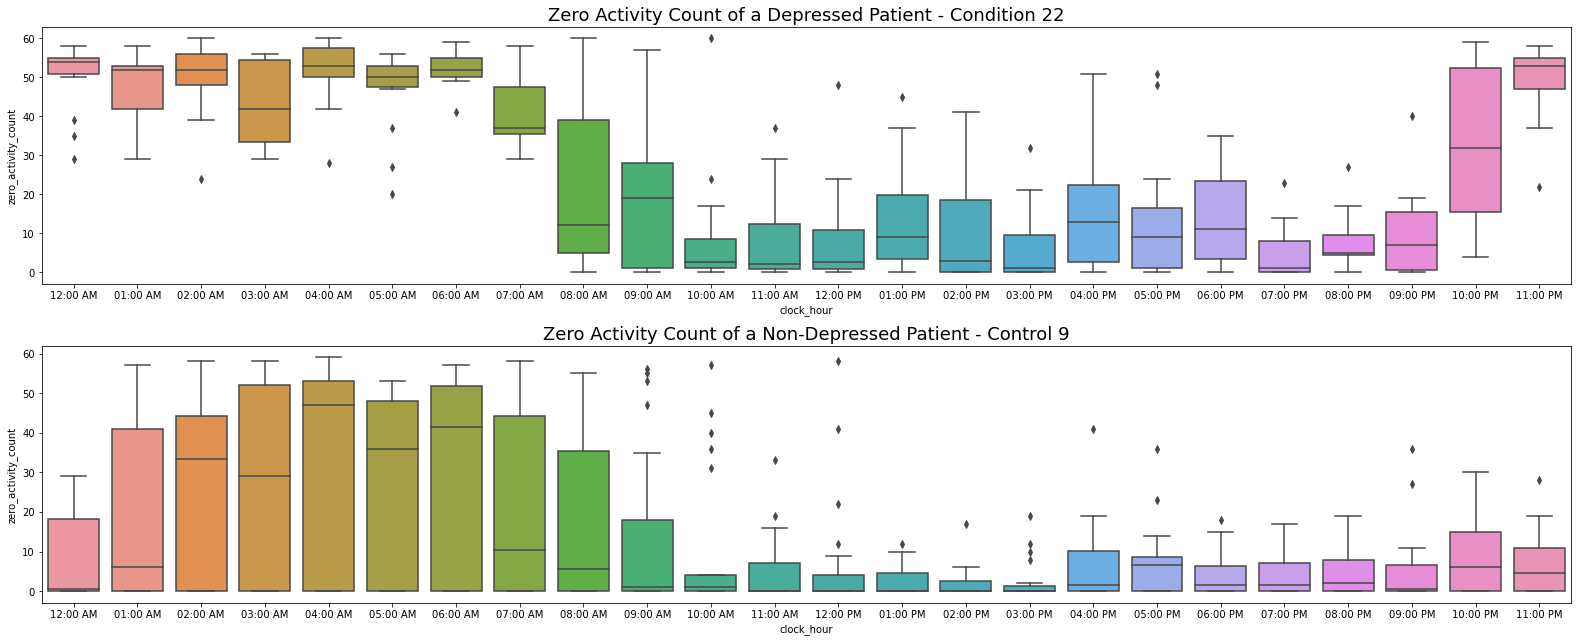

In [218]:
# Time series plots of Zero Activity Count
fig, axes = plt.subplots(2, 1, figsize=(22, 9))
df = conditions[21].reset_index()
df['hour'] = [d.hour for d in df.timestamp]
df = df.sort_values('hour')
df['clock_hour'] = df['hour'].apply(lambda x: clock_converter(x))
sns.boxplot(x='clock_hour', y='zero_activity_count', data=df, ax=axes[0])
axes[0].set_title('Zero Activity Count of a Depressed Patient - Condition 22', fontsize=18)

df = controls[8].reset_index()
df['hour'] = [d.hour for d in df.timestamp]
df = df.sort_values('hour')
df['clock_hour'] = df['hour'].apply(lambda x: clock_converter(x))
sns.boxplot(x='clock_hour', y='zero_activity_count', data=df, ax=axes[1])
axes[1].set_title('Zero Activity Count of a Non-Depressed Patient - Control 9', fontsize=18)

fig.tight_layout(pad=1.0)
plt.show()

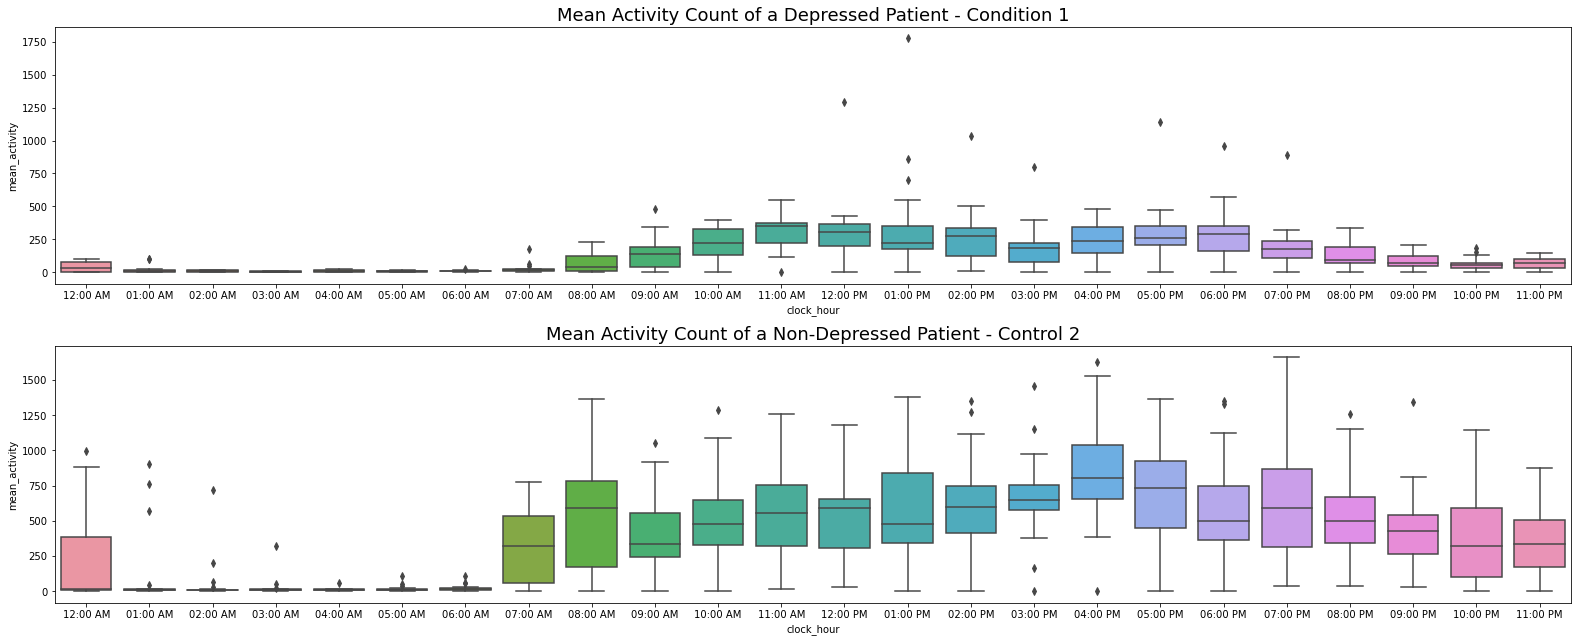

In [216]:
# Time series plots of Mean Activity Count
fig, axes = plt.subplots(2, 1, figsize=(22, 9))
df = conditions[0].reset_index()
df['hour'] = [d.hour for d in df.timestamp]
df = df.sort_values('hour')
df['clock_hour'] = df['hour'].apply(lambda x: clock_converter(x))
sns.boxplot(x='clock_hour', y='mean_activity', data=df, ax=axes[0])
axes[0].set_title('Mean Activity Count of a Depressed Patient - Condition 1', fontsize=18)

df = controls[1].reset_index()
df['hour'] = [d.hour for d in df.timestamp]
df = df.sort_values('hour')
df['clock_hour'] = df['hour'].apply(lambda x: clock_converter(x))
sns.boxplot(x='clock_hour', y='mean_activity', data=df, ax=axes[1])
axes[1].set_title('Mean Activity Count of a Non-Depressed Patient - Control 2', fontsize=18)

fig.tight_layout(pad=1.0)
plt.show()

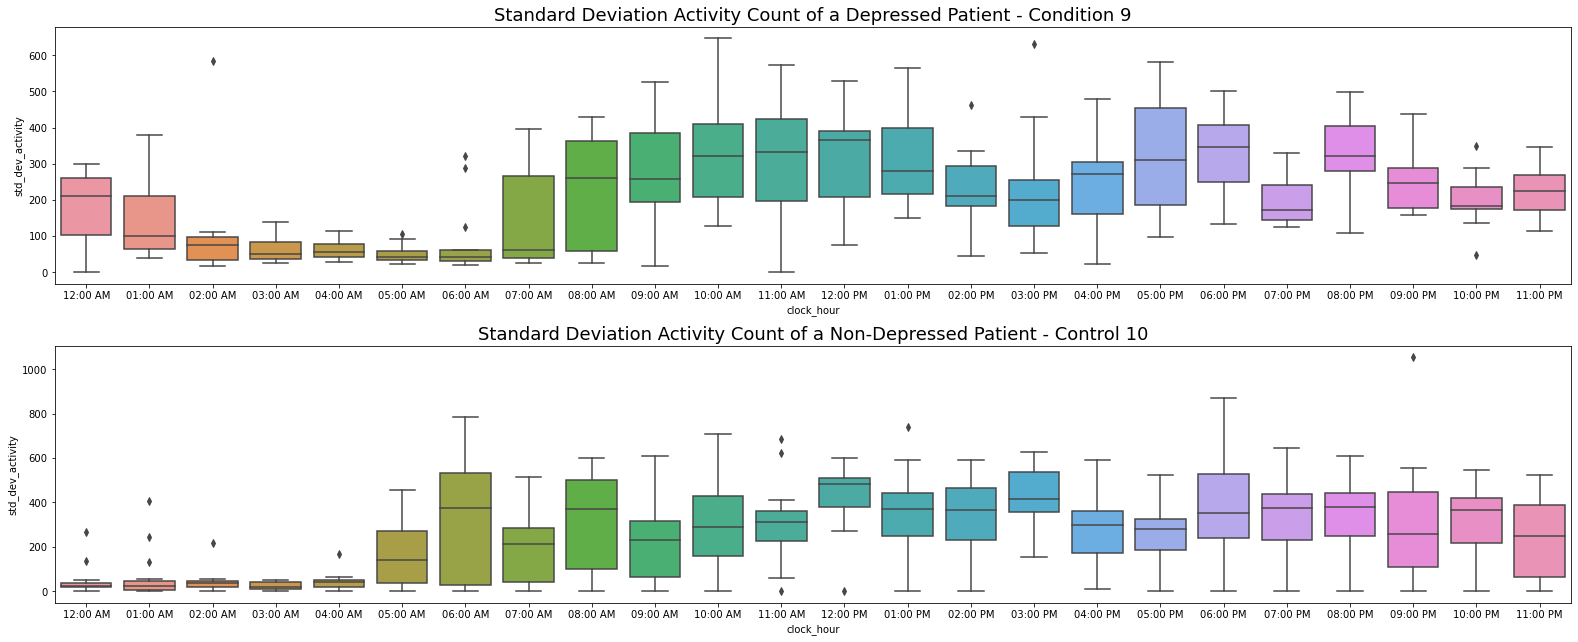

In [215]:
# Time series plots of Standard Deviation Activity Count
fig, axes = plt.subplots(2, 1, figsize=(22, 9))
df = conditions[8].reset_index()
df['hour'] = [d.hour for d in df.timestamp]
df = df.sort_values('hour')
df['clock_hour'] = df['hour'].apply(lambda x: clock_converter(x))
sns.boxplot(x='clock_hour', y='std_dev_activity', data=df, ax=axes[0])
axes[0].set_title('Standard Deviation Activity Count of a Depressed Patient - Condition 9', fontsize=18)

df = controls[9].reset_index()
df['hour'] = [d.hour for d in df.timestamp]
df = df.sort_values('hour')
df['clock_hour'] = df['hour'].apply(lambda x: clock_converter(x))
sns.boxplot(x='clock_hour', y='std_dev_activity', data=df, ax=axes[1])
axes[1].set_title('Standard Deviation Activity Count of a Non-Depressed Patient - Control 10', fontsize=18)

fig.tight_layout(pad=1.0)
plt.show()